In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import MultiColumnLabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import pickle

In [2]:
data=pd.read_csv("garments_worker_productivity.csv")


In [3]:
data.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


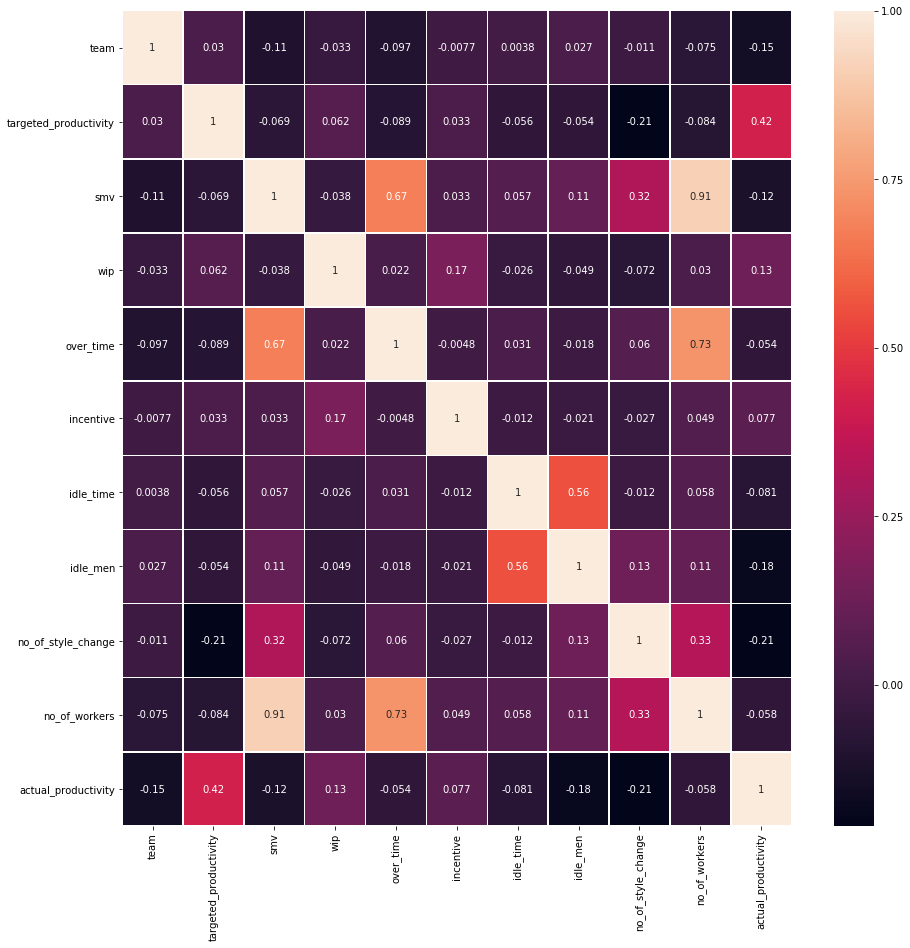

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
corrMatrix = data.corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corrMatrix, annot=True, linewidths=.5, ax=ax)
plt.show()

In [5]:
data.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [6]:
data.shape
(1197,15)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
date                     1197 non-null object
quarter                  1197 non-null object
department               1197 non-null object
day                      1197 non-null object
team                     1197 non-null int64
targeted_productivity    1197 non-null float64
smv                      1197 non-null float64
wip                      691 non-null float64
over_time                1197 non-null int64
incentive                1197 non-null int64
idle_time                1197 non-null float64
idle_men                 1197 non-null int64
no_of_style_change       1197 non-null int64
no_of_workers            1197 non-null float64
actual_productivity      1197 non-null float64
dtypes: float64(6), int64(5), object(4)
memory usage: 140.4+ KB


In [7]:
data.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [8]:
data.drop(['wip'],axis=1,inplace=True)

In [9]:
data["date"] = pd.to_datetime(data["date"])

In [10]:
data.date

0      2015-01-01
1      2015-01-01
2      2015-01-01
3      2015-01-01
4      2015-01-01
5      2015-01-01
6      2015-01-01
7      2015-01-01
8      2015-01-01
9      2015-01-01
10     2015-01-01
11     2015-01-01
12     2015-01-01
13     2015-01-01
14     2015-01-01
15     2015-01-01
16     2015-01-01
17     2015-01-01
18     2015-01-01
19     2015-01-03
20     2015-01-03
21     2015-01-03
22     2015-01-03
23     2015-01-03
24     2015-01-03
25     2015-01-03
26     2015-01-03
27     2015-01-03
28     2015-01-03
29     2015-01-03
          ...    
1167   2015-03-10
1168   2015-03-10
1169   2015-03-10
1170   2015-03-10
1171   2015-03-10
1172   2015-03-10
1173   2015-03-11
1174   2015-03-11
1175   2015-03-11
1176   2015-03-11
1177   2015-03-11
1178   2015-03-11
1179   2015-03-11
1180   2015-03-11
1181   2015-03-11
1182   2015-03-11
1183   2015-03-11
1184   2015-03-11
1185   2015-03-11
1186   2015-03-11
1187   2015-03-11
1188   2015-03-11
1189   2015-03-11
1190   2015-03-11
1191   201

In [11]:
data['month']=data['date'].dt.month
data.drop(['date'],axis=1, inplace=True)

In [12]:
data.month

0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
       ..
1167    3
1168    3
1169    3
1170    3
1171    3
1172    3
1173    3
1174    3
1175    3
1176    3
1177    3
1178    3
1179    3
1180    3
1181    3
1182    3
1183    3
1184    3
1185    3
1186    3
1187    3
1188    3
1189    3
1190    3
1191    3
1192    3
1193    3
1194    3
1195    3
1196    3
Name: month, Length: 1197, dtype: int64

In [13]:
data['department'].value_counts()

sweing        691
finishing     257
finishing     249
Name: department, dtype: int64

In [14]:
data['department'] = data['department'].apply(lambda x:'finishing' if x.replace("","")=='finishing' else 'sweing')

In [15]:
data['department'].value_counts()

sweing       948
finishing    249
Name: department, dtype: int64

In [16]:
import MultiColumnLabelEncoder
Mcle = MultiColumnLabelEncoder.MultiColumnLabelEncoder()
data = Mcle.fit_transform(data)

In [17]:
x=data.drop(['actual_productivity'],axis=1)
y=data['actual_productivity']

In [18]:
X=x.to_numpy()

In [19]:
X

array([[ 0. ,  0. ,  0. , ...,  0. , 59. ,  1. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  8. ,  1. ],
       [ 0. ,  0. ,  0. , ...,  0. , 30.5,  1. ],
       ...,
       [ 1. ,  1. ,  5. , ...,  0. ,  8. ,  3. ],
       [ 1. ,  1. ,  5. , ...,  0. , 15. ,  3. ],
       [ 1. ,  1. ,  5. , ...,  0. ,  6. ,  3. ]])

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y,train_size=0.8,random_state=0)


In [25]:
from sklearn.linear_model import LinearRegression
model_lr=LinearRegression()


In [26]:
model_lr.fit(x_test,y_test)
pred_test=model_lr.predict(x_test)
print("test_MSE:",mean_squared_error(y_test, pred_test))
print("test_MAE:",mean_absolute_error(y_test, pred_test))
print("R2_score:{}".format(r2_score(y_test, pred_test)))

test_MSE: 0.019158705703491208
test_MAE: 0.09977157899843243
R2_score:0.3519988499111938


In [27]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=200,max_depth=5)


In [28]:
model_rf.fit(x_test,y_test)
pred = model_rf.predict(x_test)
print("test_MSE:",mean_squared_error(y_test, pred))
print("test_MAE:",mean_absolute_error(y_test, pred)) 
print("R2_score:{}".format(r2_score(y_test, pred)))

test_MSE: 0.007645228496152779
test_MAE: 0.06221287492854128
R2_score:0.7414169341671162


In [29]:
import xgboost as xgb
model_xgb = xgb.XGBRegressor(n_estimators=200, max_depth=5, learning_rate=0.1)


In [30]:
model_xgb.fit(x_test,y_test)
pred3=model_xgb.predict(x_test)
print("test_MSE:",mean_squared_error(y_test, pred3))
print("test_MAE:",mean_absolute_error(y_test, pred3))
print("R2_score:{}".format(r2_score(y_test, pred3)))

test_MSE: 0.0001606677613929356
test_MAE: 0.007484510903351275
R2_score:0.9945657657789564


In [31]:
model_lr.fit(x_train,y_train)
pred_test=model_lr.predict(x_test)
print("test_MSE:",mean_squared_error(y_test, pred_test)) 
print("test_MAE:",mean_absolute_error(y_test, pred_test)) 
print("R2_score:{}".format(r2_score(y_test, pred_test)))

test_MSE: 0.02084125105259606
test_MAE: 0.10567987426824522
R2_score:0.29509044815533625


In [32]:
pred = model_rf.predict(x_test)
print("test_MSE:",mean_squared_error(y_test, pred)) 
print("test_MAE:",mean_absolute_error(y_test, pred))
print("R2_score:{}".format(r2_score(y_test, pred)))

test_MSE: 0.007645228496152779
test_MAE: 0.06221287492854128
R2_score:0.7414169341671162


In [34]:
pred = model_rf.predict(x_test)
print("test_MSE:",mean_squared_error(y_test, pred)) 
print("test_MAE:",mean_absolute_error(y_test, pred))
print("R2_score:{}".format(r2_score(y_test, pred)))

test_MSE: 0.007645228496152779
test_MAE: 0.06221287492854128
R2_score:0.7414169341671162


In [35]:
pred3=model_xgb.predict(x_test)

In [36]:
print("test_MSE:",mean_squared_error(y_test, pred3)) 
print("test_MAE:",mean_absolute_error(y_test, pred3)) 
print("R2_score:{}".format(r2_score(y_test, pred3)))

test_MSE: 0.0001606677613929356
test_MAE: 0.007484510903351275
R2_score:0.9945657657789564


In [37]:
import pickle
pickle.dump(model_xgb,open('gwp.pkl','wb'))